<a href="https://colab.research.google.com/github/Apoorva-Khare/ML_Models_Implementation/blob/main/KNearest_Neighbors.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
import numpy as np

# Features: [Weight, Color Score]
X = np.array([
    [150, 0.8],
    [170, 0.75],
    [140, 0.82],
    [130, 0.7],
    [160, 0.65],
    [120, 0.6]
])

# Labels
y = np.array(['Apple', 'Apple', 'Apple', 'Orange', 'Orange', 'Orange'])

# Create KNN model with k=3
knn = KNeighborsClassifier(n_neighbors=3)

# Train the model
knn.fit(X, y)

# New fruit to classify
new_fruit = np.array([[155, 0.72]])

# Predict the class
prediction = knn.predict(new_fruit)
print(f"The new fruit is classified as: {prediction[0]}")


The new fruit is classified as: Apple


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
import numpy as np

X = np.array([[150, 0.8], [170, 0.75], [140, 0.82], [130, 0.7], [160, 0.65], [120, 0.6]])
y = np.array(['Apple', 'Apple', 'Apple', 'Orange', 'Orange', 'Orange'])

k_range = range(1, 5)  # Max K = 4 because of fold size

scores = []

for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    score = cross_val_score(knn, X, y, cv=3, scoring='accuracy').mean()
    scores.append(score)

print(scores)



[0.8333333333333334, 0.5, 0.6666666666666666, 0.5]


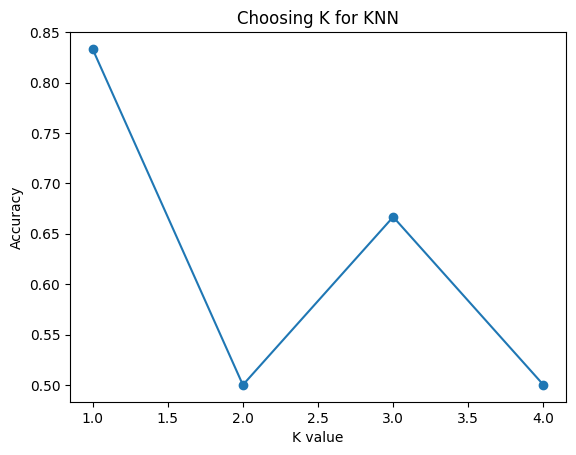

In [ ]:
import matplotlib.pyplot as plt

plt.plot(k_range, scores, marker='o')
plt.xlabel('K value')
plt.ylabel('Accuracy')
plt.title('Choosing K for KNN')
plt.show()


In [ ]:
from sklearn.datasets import load_iris
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Load dataset
iris = load_iris()
X = iris.data
y = iris.target

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Create KNN model
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)

# Predict
y_pred = knn.predict(X_test)

# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")


Accuracy: 100.00%


In [ ]:
# Features and labels
X = [
    [1.4, 0.2],
    [1.5, 0.3],
    [4.7, 1.4],
    [4.5, 1.5],
    [5.1, 1.8],
    [5.3, 1.9]
]

y = ['Setosa', 'Setosa', 'Versicolor', 'Versicolor', 'Virginica', 'Virginica']

# Create and train the model
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X, y)

# New flower to classify
new_flower = [[4.8, 1.6]]
prediction = knn.predict(new_flower)

print(f"The new flower is classified as: {prediction[0]}")


The new flower is classified as: Versicolor


We classify a new flower with petal length 4.8 and width 1.6.
The model checks the 3 nearest known flowers.
Majority class among them decides the predicted flower type.

In [ ]:
from sklearn.datasets import load_iris
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, classification_report


# Load dataset
iris = load_iris()
X = iris.data
y = iris.target

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Standardize features(knn is distance based, so scaling is important)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Create KNN model
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)

# Predict
y_pred = knn.predict(X_test)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\n Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\n Classification Report:\n", classification_report(y_test, y_pred, target_names = iris.target_names))

Accuracy: 1.0

 Confusion Matrix:
 [[19  0  0]
 [ 0 13  0]
 [ 0  0 13]]

 Classification Report:
               precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        19
  versicolor       1.00      1.00      1.00        13
   virginica       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



Macro Avg: Average of precision, recall, F1 for all classes equally.

Weighted Avg: Average of metrics weighted by class support (useful when classes are imbalanced).